# Superhero Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

import data

In [1]:
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [2]:
with open('superhero/superheroes.txt','r') as f:
  data=f.read()

data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [3]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Create a tokenizer

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

tokenizer.fit_on_texts(data)

char-to-index and index-to-char dictionaries

In [6]:
char_to_index=tokenizer.word_index
index_to_char = dict((v,k) for k,v in char_to_index.items())

converting between names and sequences

In [8]:
names =  data.splitlines()
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [9]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [10]:
def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [11]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [12]:
def seq_to_name(seq):
  return ''.join([index_to_char[i] for i in seq if i!=0])

In [13]:
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

Creating sequences


In [15]:
sequences=[]

In [16]:
for name in names:
  seq=name_to_seq(name)
  if len(seq)>=2:
    sequences+=[seq[:i] for i in range (2,len(seq)+1)]

In [17]:
sequences[:10]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [18]:
max_len=max([len(x) for x in sequences])
max_len

33

Padding all sequences

In [19]:
paddded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences,padding='pre',maxlen=max_len)

paddded_sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 16],
      dtype=int32)

In [20]:
paddded_sequences.shape

(88279, 33)

Creating Training and Validation Sets



In [21]:
x,y=paddded_sequences[:,:-1],paddded_sequences[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y)



In [23]:
num_chars=len(char_to_index.keys())+1

In [24]:
num_chars

29

Creating the Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM
from tensorflow.keras.layers import Bidirectional, Dense

model = Sequential([
                    Embedding(num_chars,8,input_length=max_len-1),
                    Conv1D(64,5,strides=1,activation='tanh',padding='causal'),
                    MaxPool1D(2),
                    LSTM(32),
                    Dense(num_chars,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 8)             232       
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            2624      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 29)                957       
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [26]:
h=model.fit(
    x_train,y_train,validation_data=(x_test,y_test),
    epochs=50,verbose=2,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
)
    

Epoch 1/50
2070/2070 - 43s - loss: 2.7478 - accuracy: 0.1870 - val_loss: 2.5628 - val_accuracy: 0.2329
Epoch 2/50
2070/2070 - 9s - loss: 2.5164 - accuracy: 0.2419 - val_loss: 2.4809 - val_accuracy: 0.2502
Epoch 3/50
2070/2070 - 9s - loss: 2.4517 - accuracy: 0.2579 - val_loss: 2.4394 - val_accuracy: 0.2606
Epoch 4/50
2070/2070 - 9s - loss: 2.4046 - accuracy: 0.2700 - val_loss: 2.4002 - val_accuracy: 0.2708
Epoch 5/50
2070/2070 - 9s - loss: 2.3673 - accuracy: 0.2787 - val_loss: 2.3720 - val_accuracy: 0.2806
Epoch 6/50
2070/2070 - 9s - loss: 2.3380 - accuracy: 0.2883 - val_loss: 2.3488 - val_accuracy: 0.2897
Epoch 7/50
2070/2070 - 11s - loss: 2.3116 - accuracy: 0.2964 - val_loss: 2.3288 - val_accuracy: 0.2997
Epoch 8/50
2070/2070 - 9s - loss: 2.2883 - accuracy: 0.3044 - val_loss: 2.3131 - val_accuracy: 0.3030
Epoch 9/50
2070/2070 - 9s - loss: 2.2673 - accuracy: 0.3126 - val_loss: 2.3008 - val_accuracy: 0.3097
Epoch 10/50
2070/2070 - 9s - loss: 2.2494 - accuracy: 0.3184 - val_loss: 2.2921 

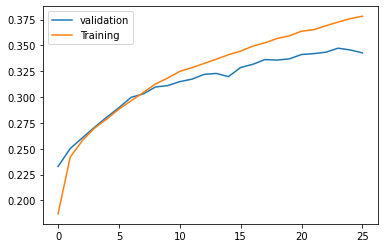

In [27]:
from matplotlib import pyplot as plt

epochs_ran = len(h.history['loss'])
plt.plot(range(0,epochs_ran),h.history['val_accuracy'],label='validation')
plt.plot(range(0,epochs_ran),h.history['accuracy'],label='Training')
plt.legend()
plt.show()

Generate Names!

In [28]:
def generate_names(seed):
  for i in range(0,40):
    seq=name_to_seq(seed)
    padded = tf.keras.preprocessing.sequence.pad_sequences(
        [seq],padding='pre',maxlen=max_len-1,truncating='pre')
    pred = model.predict(padded)[0]
    pred_char=index_to_char[tf.argmax(pred).numpy()]
    seed+=pred_char

    if pred_char == '\t':
      break
  print(seed)


In [29]:
generate_names('am')

amarian man	
